# Individual Assessment

Computational Methods for Finance

In [113]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import scipy.stats as si

Download the data from Yahoo Finance of Meta(Facebook) and save it as a pandas DataFrame.

In [109]:
initial_data = yf.download("FB ^VIX", start="2020-11-01", end="2021-11-01")

[*********************100%***********************]  2 of 2 completed


In [223]:
initial_data.head()

Adj Close                  Close                   High  \
                    FB       ^VIX          FB       ^VIX          FB   
Date                                                                   
2020-11-02  261.359985  37.130001  261.359985  37.130001  270.470001   
2020-11-03  265.299988  35.549999  265.299988  35.549999  270.049988   
2020-11-04  287.380005  29.570000  287.380005  29.570000  288.940002   
2020-11-05  294.679993  27.580000  294.679993  27.580000  297.380005   
2020-11-06  293.410004  24.860001  293.410004  24.860001  294.600006   

                              Low                   Open               Volume  \
                 ^VIX          FB       ^VIX          FB       ^VIX        FB   
Date                                                                            
2020-11-02  38.779999  257.339996  36.130001  264.600006  38.570000  27165700   
2020-11-03  36.439999  260.880005  34.189999  263.160004  36.439999  17961900   
2020-11-04  36.849998  278.619995  28.030001  281.000000  36.790001  35364400   
2020-11-05  28.139999  288.950012  26.040001  291.899994  27.559999  23823600   
2020-11-06  29.440001  288.059998  24.559999  293.950012  27.870001  13891000   

                 
           ^VIX  
Date             
2020-11-02    0  
2020-11-03    0  
2020-11-04    0  
2020-11-05    0  
2020-11-06    0

In [111]:
initial_data['Adj Close'].head()

,FB,^VIX
Date,,
2020-11-02,261.359985,37.130001
2020-11-03,265.299988,35.549999
2020-11-04,287.380005,29.570000
2020-11-05,294.679993,27.580000
2020-11-06,293.410004,24.860001


In [112]:
data = initial_data['Adj Close']
fb= data['FB']
vix= data['^VIX']
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2020-11-02 to 2021-10-29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FB      251 non-null    float64
 1   ^VIX    251 non-null    float64
dtypes: float64(2)
memory usage: 5.9 KB


In [114]:
data.head()

,FB,^VIX
Date,,
2020-11-02,261.359985,37.130001
2020-11-03,265.299988,35.549999
2020-11-04,287.380005,29.570000
2020-11-05,294.679993,27.580000
2020-11-06,293.410004,24.860001


In [115]:
data.tail()

,FB,^VIX
Date,,
2021-10-25,328.690002,15.240000
2021-10-26,315.809998,15.980000
2021-10-27,312.220001,16.980000
2021-10-28,316.920013,16.530001
2021-10-29,323.570007,16.260000


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

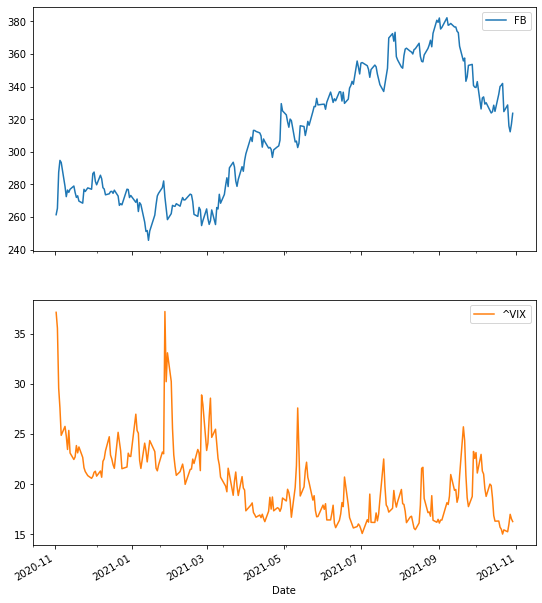

In [116]:
data.plot(figsize=(9,11), subplots=True)

In [117]:
data.describe()

,FB,^VIX
count,251.000000,251.000000
mean,311.545657,20.267888
std,37.800320,3.804411
min,245.639999,15.010000
25%,274.750000,17.250000
50%,312.459991,19.660000
75%,342.445007,22.495000
max,382.179993,37.209999


In [118]:
data.describe().round(2)

,FB,^VIX
count,251.00,251.00
mean,311.55,20.27
std,37.80,3.80
min,245.64,15.01
25%,274.75,17.25
50%,312.46,19.66
75%,342.45,22.49
max,382.18,37.21


In [119]:
data.diff().head()

,FB,^VIX
Date,,
2020-11-02,NaN,NaN
2020-11-03,3.940002,-1.580002
2020-11-04,22.080017,-5.980000
2020-11-05,7.299988,-1.990000
2020-11-06,-1.269989,-2.719999


From a statistics point of view, absolute changes are not optimal because they are dependent on the scale of the time series data itself. Therefore, percentage changes are usually preferred. The following code derives the percentage changes or percentage returns (also: simple returns) in a financial context and visualizes their mean values per column:

In [120]:
data.diff().describe().round(2)

,FB,^VIX
count,250.00,250.00
mean,0.25,-0.08
std,5.77,1.94
min,-17.27,-7.00
25%,-3.33,-0.96
50%,0.06,-0.26
75%,4.03,0.74
max,22.41,14.19


Percentage Change- Daily Normal Return (Daily)

In [121]:
data.pct_change().round(4).head()

,FB,^VIX
Date,,
2020-11-02,NaN,NaN
2020-11-03,0.0151,-0.0426
2020-11-04,0.0832,-0.1682
2020-11-05,0.0254,-0.0673
2020-11-06,-0.0043,-0.0986


Bar Chart for each Mean Percentage Change (Daily Return)

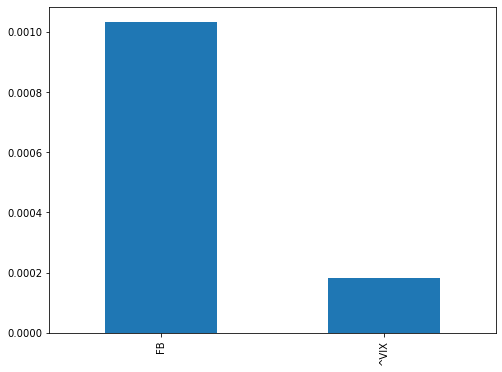

In [122]:
data.pct_change().mean().plot(kind='bar', figsize=(8, 6));

As an alternative to percentage returns, log returns can be used. In some scenarios, they are easier to handle and therefore often preferred in a financial context.

In [124]:
rets = np.log(data / data.shift(1))
rets.head().round(3)

,FB,^VIX
Date,,
2020-11-02,NaN,NaN
2020-11-03,0.015,-0.043
2020-11-04,0.080,-0.184
2020-11-05,0.025,-0.070
2020-11-06,-0.004,-0.104


Plotting Commulative Log Return using continuous compounding return (Starts from 1)


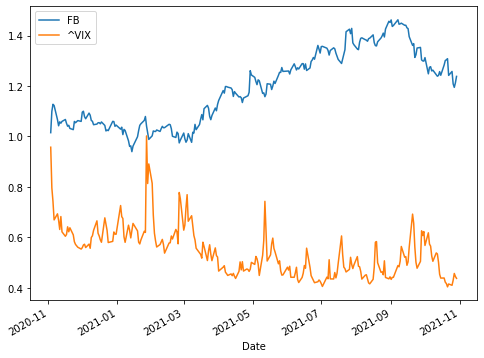

In [125]:
rets.cumsum().apply(np.exp).plot(figsize=(8, 6));

It is financial tradition to work with rolling statistics, often also called financial indicators or financial studies. Such rolling statistics are basic tools for financial chartists and technical traders, for example. This section works with a single financial time series only:

In [126]:
sym = 'FB'
FB_data = pd.DataFrame(data[sym]).dropna()
FB_data.tail()

,FB
Date,
2021-10-25,328.690002
2021-10-26,315.809998
2021-10-27,312.220001
2021-10-28,316.920013
2021-10-29,323.570007


Rolling Window is 10 that means 2 weeks.


Mininum, Average, Standard Deviation, Median, Maximum and Moving Average.

In [127]:
window = 10
FB_data['min'] = data[sym].rolling(window=window).min()
FB_data['mean'] = data[sym].rolling(window=window).mean()
FB_data['std'] = data[sym].rolling(window=window).std()
FB_data['median'] = data[sym].rolling(window=window).median()
FB_data['max'] = data[sym].rolling(window=window).max()
FB_data['ewma'] = data[sym].ewm(halflife=0.5, min_periods=window).mean()
FB_data.dropna().head()

,FB,min,mean,std,median,max,ewma
Date,,,,,,,
2020-11-13,276.950012,261.359985,278.183997,10.980153,276.715012,294.679993,276.545315
2020-11-16,278.959991,265.299988,279.943997,9.259546,277.860001,294.679993,278.356323
2020-11-17,275.000000,272.429993,280.913998,7.973844,277.860001,294.679993,275.839081
2020-11-18,271.970001,271.970001,279.372998,8.073818,276.715012,294.679993,272.937271
2020-11-19,272.940002,271.970001,277.198999,6.204796,275.779999,293.410004,272.939320


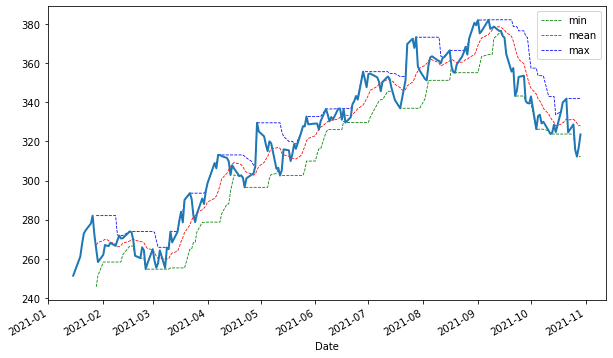

In [225]:
ax = FB_data[['min', 'mean', 'max']].iloc[-200:].plot(figsize=(10, 6), style=['g--', 'r--', 'b--'], lw=0.8)
data[sym].iloc[-200:].plot(ax=ax, lw=2.0);

Rolling statistics are a major tool in the so-called technical analysis of stocks, as compared to the fundamental analysis which focuses, for instance, on financial reports and the strategic positions of the company whose stock is being analysed.

A decades-old trading strategy based on technical analysis is using two simple moving averages (SMAs). The idea is that the trader should go long on a stock (or financial instrument in general) when the shorter-term SMA is above the longer-term SMA and should go short when the opposite holds true. The concepts can be made precise with pandas and the capabilities of the DataFrame object.

Rolling statistics are generally only calculated when there is enough data given the window parameter specification.

In [129]:
FB_data['SMA1'] = data[sym].rolling(window=20).mean()
FB_data['SMA2'] = data[sym].rolling(window=60).mean()
FB_data[[sym, 'SMA1', 'SMA2']].tail()

,FB,SMA1,SMA2
Date,,,
2021-10-25,328.690002,332.655000,354.385501
2021-10-26,315.809998,331.413000,353.783168
2021-10-27,312.220001,330.043501,353.132834
2021-10-28,316.920013,328.920001,352.432834
2021-10-29,323.570007,327.948001,351.776168


<AxesSubplot:xlabel='Date'>

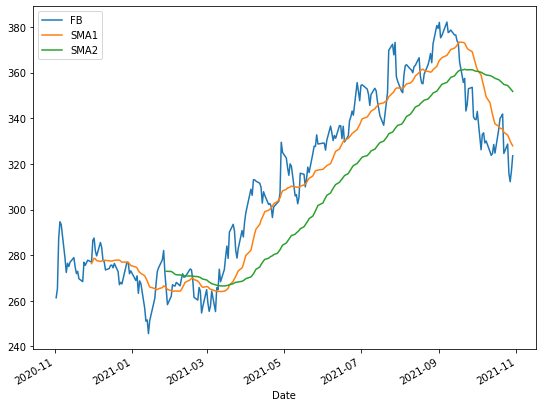

In [130]:
FB_data[[sym, 'SMA1', 'SMA2']].plot(figsize=(9, 7))

Condition: If SMA1 > SMA2 than 1 otherwise -1

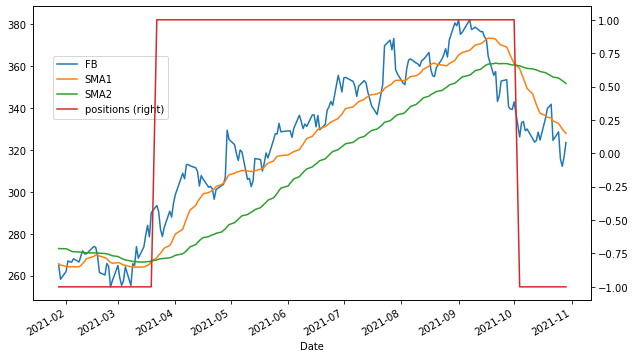

In [131]:
FB_data.dropna(inplace=True)
FB_data['positions'] = np.where(FB_data['SMA1'] > FB_data['SMA2'],1,-1)
ax = FB_data[[sym, 'SMA1', 'SMA2', 'positions']].plot(figsize=(10, 6),secondary_y='positions')
ax.get_legend().set_bbox_to_anchor((0.25, 0.85))

As a further illustration of how to work with pandas and financial time series data, consider the case of the FB stock index and the VIX volatility index.

It is a stylized fact that when the FB rises, the VIX rises in general, and vice versa. This is about correlation and not causation. This section shows how to come up with some supporting statistical evidence for the stylized fact that the FB Stock and the VIX are (highly) positively correlated.

In [221]:
Corr_data = data[['FB', '^VIX']].dropna()
Corr_data.tail()

,FB,^VIX
Date,,
2021-10-25,328.690002,15.240000
2021-10-26,315.809998,15.980000
2021-10-27,312.220001,16.980000
2021-10-28,316.920013,16.530001
2021-10-29,323.570007,16.260000


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

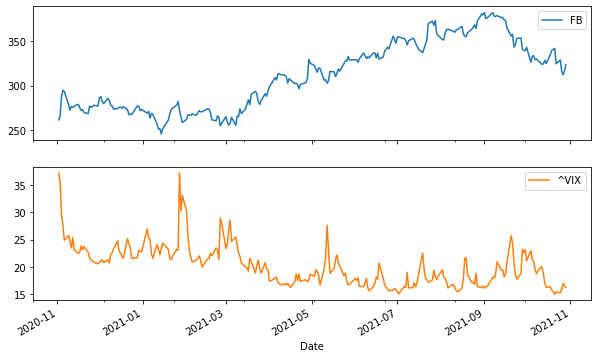

In [222]:
Corr_data.plot(subplots=True, figsize=(10, 6))

# Annualised Volatility & Market Volatility

In [132]:
log_return = np.log(fb / fb.shift(1))

In [133]:
vol = np.sqrt(252) * log_return.std()
print ('The annualised Volatility is', round(vol*100,2), '%')

The annualised Volatility is 29.94 %


In [134]:
vix= vix[-1]
print('The Market Volatility is', round(vix,2), '%')

The Market Volatility is 16.26 %


# #Input Table

In [135]:
fb[-1]

323.57000732421875

Valuation is performed iteratively, starting at each of the final nodes (those that may be reached at the time of expiration), and then working backwards through the tree towards the first node (valuation date). The value computed at each stage is the value of the option at that point in time.

In [136]:
S0 = fb[-1]           #Spot Stock Price
K = 310               #Strike Price
T = 1.0               #Time to maturity
r = 0.01536           #Risk free Rate "U.S. 10 Year Treasury Note" Source:Market Watch
sig = 0.1626          #Diffusion Coefficient or Volatility
N = 6                 #Number of time steps or Number of Periods
payoff = "call"       #Payoff

# Binomial Options Pricing Model

The Binomial options pricing model approach has been widely used since it is able to handle a variety of conditions for which other models cannot easily be applied. This is largely because the BOPM is based on the description of an underlying instrument over a period of time rather than a single point.

The tree of prices is produced by working forward from valuation date to expiration.

At each step, it is assumed that the underlying instrument will move up or down by a specific factor ( u or d) per step of the tree (where, by definition, u ≥ 1 and 0 < d ≤ 1 ). So, if S is the current price, then in the next period the price will either be S_up = S u or S_down = S d.

In [ ]:
dT = float(T) / N                 #Delta
u = np.exp(sig * np.sqrt(dT))     #Up factor
d = 1.0 / u                       #Down Factor

In [138]:
S = np.zeros((N + 1, N + 1))
S[0, 0] = S0
z=1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1

In [139]:
S       #Simulation for prices.

array([[323.57000732, 345.77790245, 369.51001364, 394.87095391,
        421.97251627, 450.93416653, 481.8835699 ],
       [  0.        , 302.78843413, 323.57000732, 345.77790245,
        369.51001364, 394.87095391, 421.97251627],
       [  0.        ,   0.        , 283.34157607, 302.78843413,
        323.57000732, 345.77790245, 369.51001364],
       [  0.        ,   0.        ,   0.        , 265.14370987,
        283.34157607, 302.78843413, 323.57000732],
       [  0.        ,   0.        ,   0.        ,   0.        ,
        248.1146179 , 265.14370987, 283.34157607],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        , 232.1792346 , 248.1146179 ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        , 217.26731555]])

In [140]:
a = np.exp(r * dT)            #Risk Free Compound Return
p = (a - d)/ (u - d)          #Risk Neutral Up Probability 
q = 1.0 - p                   #Risk Neutral Down Probability
p

0.5027039048641296

At each final node of the tree-i.e. at expiration of the option-the option value is simply its intrinsic, or exercise, value: Max[(S_n-K),0] for a call option and Max[(K-S_n),0] for a put option, where K is the strike price and S_n is the spot price of the underlying asset at the n-th period.

In [141]:
S_T = S[:,-1]
V = np.zeros((N + 1, N + 1))
if payoff =="call":
    V[:,-1] = np.maximum(S_T-K, 0.0)
elif payoff =="put":
    V[:,-1] = np.maximum(K-S_T, 0.0)
V

array([[  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        , 171.8835699 ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        , 111.97251627],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,  59.51001364],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,  13.57000732],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ]])

Once the above step is complete, the option value is then found for each node, starting at the penultimate time step, and working back to the first node of the tree (the valuation date) where the calculated result is the value of the option.

# European Option

In [142]:
# for European Option
for j in range(N-1, -1, -1):
    for i in range(j+1):
        V[i,j] = np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1])
V

array([[ 31.35308944,  45.62479239,  64.2820078 ,  87.242635  ,
        113.55565996, 141.72675159, 171.8835699 ],
       [  0.        ,  17.08779733,  26.99986042,  41.40303427,
         61.09315733,  85.66353897, 111.97251627],
       [  0.        ,   0.        ,   7.15602415,  12.57922929,
         21.7122016 ,  36.5704875 ,  59.51001364],
       [  0.        ,   0.        ,   0.        ,   1.71073002,
          3.41177994,   6.80425446,  13.57000732],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ]])

In [143]:
print('European ' + payoff, str( V[0,0]))             #European option similar to vanila option

European call 31.35308944260963


# American Option

In [144]:
# for American Option
if payoff =="call":
    for j in range(N-1, -1, -1):
        for i in range(j+1):
            V[i,j] = np.maximum(S[i,j] - K,np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1]))
elif payoff =="put":
    for j in range(N-1, -1, -1):
        for i in range(j+1):
            V[i,j] = np.maximum(K - S[i,j],np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1]))
V

array([[ 31.35308944,  45.62479239,  64.2820078 ,  87.242635  ,
        113.55565996, 141.72675159, 171.8835699 ],
       [  0.        ,  17.08779733,  26.99986042,  41.40303427,
         61.09315733,  85.66353897, 111.97251627],
       [  0.        ,   0.        ,   7.15602415,  12.57922929,
         21.7122016 ,  36.5704875 ,  59.51001364],
       [  0.        ,   0.        ,   0.        ,   1.71073002,
          3.41177994,   6.80425446,  13.57000732],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ]])

In [145]:
print('American ' + payoff, str( V[0,0]))

American call 31.35308944260963


# The Monte Carlo Simulation of The Geometric Brownian Motion

It still has one Python loop, namely over the time intervals. The other dimension is handled by vectorized code over all paths.

In [146]:
def mcs_simulation_np(p):
    M = p
    I = p
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t]) 
    return S

# #Input Table

In [147]:
S0 = fb[-1]           #Spot Stock Price
K = 310               #Strike Price
T = 1.0               #Time to maturity
r = 0.01536           #Risk free Rate "U.S. 10 Year Treasury Note" Source:Market Watch
sigma = 0.1626        #Diffusion Coefficient or Volatility


In [148]:
S = mcs_simulation_np(10000)

In [149]:
S = np.transpose(S)
S

array([[323.57000732, 324.00430876, 323.93817884, ..., 261.76740028,
        262.00878758, 262.09017411],
       [323.57000732, 324.03941537, 324.19495927, ..., 351.62408645,
        351.57345674, 350.5250746 ],
       [323.57000732, 323.08242863, 322.62169374, ..., 465.81502811,
        465.18232331, 466.13257435],
       ...,
       [323.57000732, 324.28072412, 324.17085155, ..., 328.7572228 ,
        328.55602517, 328.05823576],
       [323.57000732, 323.92647263, 324.29431167, ..., 366.5666914 ,
        366.51412904, 367.34622631],
       [323.57000732, 323.27740687, 323.0813481 , ..., 367.85449245,
        368.79622956, 368.47264039]])

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-preiod values')

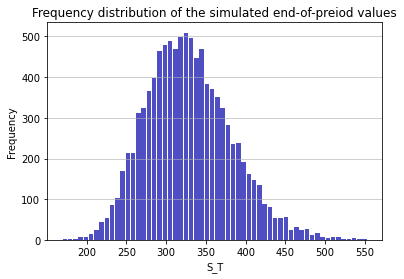

In [150]:
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-preiod values')

In [151]:
c = np.mean(np.maximum(S[:,-1] - K,0))
print('European call', str(c))

European call 31.207526478213666


# Greeks

In [152]:
def euro_option_bsm(S, K, T, r, q, vol, payoff):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: risk free rate
    #q: continuous dividend yield
    #vol: volatility of underlying asset
    #payoff: call or put
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value =  - S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [153]:
euro_option_bsm(323.57, 310, 1, 0.01536, 0, 0.299, 'call')

47.2140760543667

In [154]:
euro_option_bsm(323.57, 310, 1, 0.01536, 0, 0.299, 'put')

28.91885862541062

In [155]:
S = np.linspace(50,500,11)
Call = np.zeros((len(S),1))
Put = np.zeros((len(S),1))
for i in range(len(S)):
    Call [i] = euro_option_bsm(S[i], 310, 1, 0.01536, 0, 0.299, 'call')
    Put [i] = euro_option_bsm(S[i], 310, 1, 0.01536, 0, 0.299, 'put')

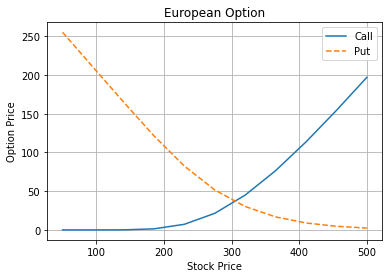

In [156]:
fig = plt.figure()
plt.plot(S, Call, '-')
plt.plot(S, Put, '--')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Option Price')
plt.title('European Option')
plt.legend(['Call','Put'])

# Delta

Delta, ∆, measures the rate of change of the theoretical option value with respect to changes in the underlying asset's price. Delta is the first derivative of the value V of the option with respect to the underlying instrument's price S.

In [157]:
def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  - np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0)
    
    return delta

In [158]:
delta(323.57, 310, 1, 0.01536, 0, 0.299, 'call')

0.6346368131039449

If the stock price increase 1 dollar, then the value of the option will increase $ 0.6346 

In [159]:
delta(323.57, 310, 1, 0.01536, 0, 0.299, 'put')

-0.36536318689605507

In [160]:
S = np.linspace(50,500,11)
Delta_Call = np.zeros((len(S),1))
Delta_Put = np.zeros((len(S),1))
for i in range(len(S)):
    Delta_Call [i] = delta(S[i], 310, 1, 0.01536, 0, 0.299, 'call')
    Delta_Put [i] = delta(S[i], 310, 1, 0.01536, 0, 0.299, 'put')

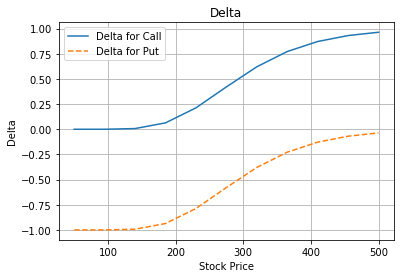

In [161]:
fig = plt.figure()
plt.plot(S, Delta_Call, '-')
plt.plot(S, Delta_Put, '--')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Delta')
plt.title('Delta')
plt.legend(['Delta for Call','Delta for Put'])

In [260]:
def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(- q * T) * si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  - np.exp(- q * T) * si.norm.cdf(- d1, 0.0, 1.0)
    
    return delta

In [261]:
S = np.linspace(50, 500, 51)
T = np.linspace(0.5, 2, 51)
Delta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Delta[i,j] = delta(S[j], 310, T[i], 0.01536, 0, 0.299, 'call')

C:\Users\HPSPEC~1\AppData\Local\Temp/ipykernel_3484/3857024986.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


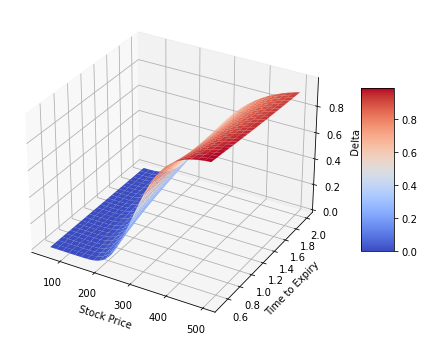

In [262]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Delta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Delta')
fig.colorbar(surf, shrink=0.5, aspect=5);

# Gamma

Gamma, Γ, measures the rate of change in the delta with respect to changes in the underlying price. Gamma is the second derivative of the value function with respect to the underlying price.

In [240]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma

In [241]:
gamma(323.57, 310, 1, 0.01536, 0, 0.299, 'call')

0.003886426559031282

In [242]:
gamma(323.57, 310, 1, 0.01536, 0, 0.299, 'put')

0.003886426559031282

In [243]:
S = np.linspace(50,500,11)
Gamma = np.zeros((len(S),1))
for i in range(len(S)):
    Gamma [i] = gamma(S[i], 310, 1, 0.01536, 0, 0.299, 'call')

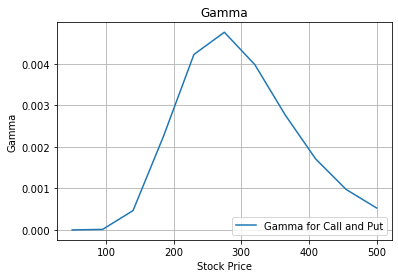

In [244]:
fig = plt.figure()
plt.plot(S, Gamma, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Gamma')
plt.title('Gamma')
plt.legend(['Gamma for Call and Put'])

In [257]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(- r * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma

In [258]:
S = np.linspace(50, 500, 51)
T = np.linspace(0.5, 2, 51)
Gamma = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Gamma[i,j] = gamma(S[j], 310, T[i], 0.01536, 0, 0.299, 'call')

C:\Users\HPSPEC~1\AppData\Local\Temp/ipykernel_3484/3848859912.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


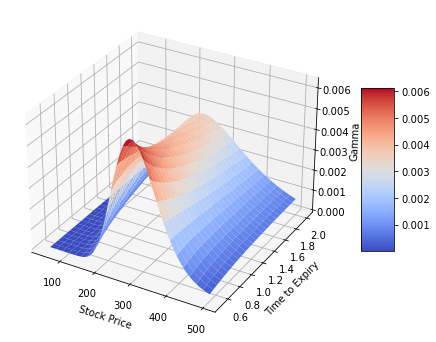

In [259]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Gamma, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Gamma')
fig.colorbar(surf, shrink=0.5, aspect=5);

# Speed

Speed measures the rate of change in Gamma with respect to changes in the underlying price.

In [167]:
def speed(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    speed = - np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / ((vol **2) * (S**2) * np.sqrt(T)) * (d1 + vol * np.sqrt(T))
    
    return speed

In [168]:
speed(323.57, 310, 1, 0.01536, 0, 0.299, 'call')

-2.5836262304067252e-05

In [169]:
speed(323.57, 310, 1, 0.01536, 0, 0.299, 'put')

-2.5836262304067252e-05

In [172]:
S = np.linspace(50,500,11)
Speed = np.zeros((len(S),1))
for i in range(len(S)):
    Speed [i] = speed(S[i], 310, 1, 0.01536, 0, 0.299, 'call')

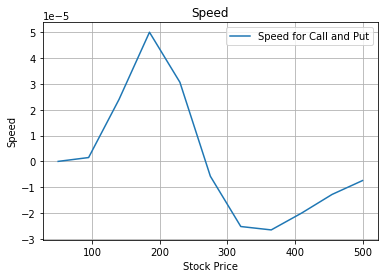

In [173]:
fig = plt.figure()
plt.plot(S, Speed, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Speed')
plt.title('Speed')
plt.legend(['Speed for Call and Put'])

In [249]:
def speed(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    speed = - np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / ((vol **2) * (S**2) * np.sqrt(T)) * (d1 + vol * np.sqrt(T))
    
    return speed

In [255]:
S = np.linspace(50, 500, 51)
T = np.linspace(0.5, 2, 51)
Speed = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Speed[i,j] = speed(S[j], 310, T[i], 0.01536, 0, 0.299, 'call')

C:\Users\HPSPEC~1\AppData\Local\Temp/ipykernel_3484/2835361978.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


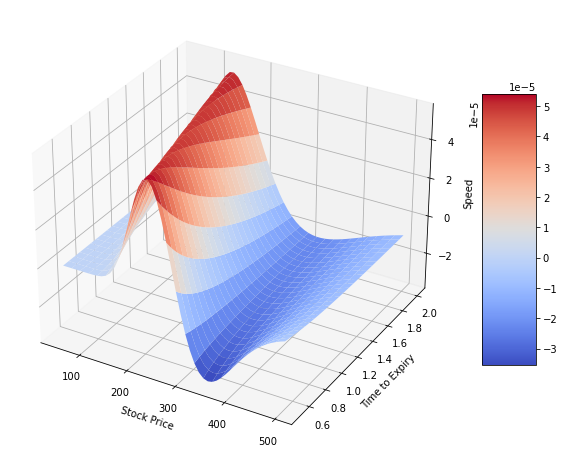

In [256]:
fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Speed, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Speed')
fig.colorbar(surf, shrink=0.5, aspect=5);

# Theta

Theta, 𝜃, measures the sensitivity of the value of the derivative to the passage of time (see Option time value): the "time decay".

In [174]:
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [175]:
theta(323.57, 310, 1, 0.01536, 0, 0.299, 'call')

20.617562108470374

In [176]:
theta(323.57, 310, 1, 0.01536, 0, 0.299, 'put')

20.448664584466897

In [203]:
T = np.linspace(0.25,0.75,12)
Theta_Call = np.zeros((len(T),1))
Theta_Put = np.zeros((len(T),1))
for i in range(len(T)):
    Theta_Call [i] = theta(323.57, 310, T[i], 0.01536, 0, 0.299, 'call')
    Theta_Put [i] = theta(323.57, 310, T[i], 0.01536, 0, 0.299, 'put')

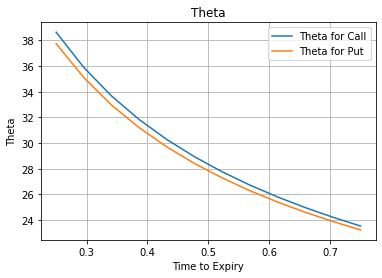

In [204]:
fig = plt.figure()
plt.plot(T, Theta_Call, '-')
plt.plot(T, Theta_Put, '-')
plt.grid()
plt.xlabel('Time to Expiry')
plt.ylabel('Theta')
plt.title('Theta')
plt.legend(['Theta for Call', 'Theta for Put'])

In [263]:
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = vol * S * np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = vol * S * np.exp(- q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [265]:
S = np.linspace(50, 500, 51)
T = np.linspace(0.5, 2, 51)
Theta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Theta[i,j] = theta(S[j], 310, T[i], 0.01536, 0, 0.299, 'call')

C:\Users\HPSPEC~1\AppData\Local\Temp/ipykernel_3484/4039138278.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


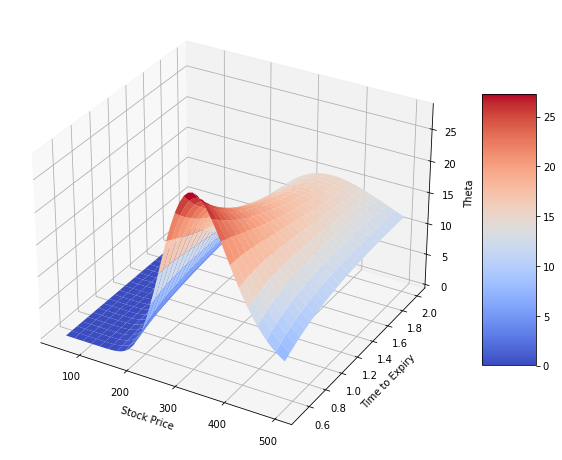

In [266]:
fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Theta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Theta')
fig.colorbar(surf, shrink=0.5, aspect=5);

# Rho

Rho, 𝜌, measures sensitivity to the interest rate: it is the derivative of the option value with respect to the risk free interest rate (for the relevant outstanding term).

In [205]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [206]:
rho(323.57, 310, 1, 0.01536, 0, 0.299, 'call')

158.13535756167676

In [207]:
rho(323.57, 310, 1, 0.01536, 0, 0.299, 'put')

-147.13942500936716

In [208]:
r = np.linspace(0,0.1,11)
Rho_Call = np.zeros((len(r),1))
Rho_Put = np.zeros((len(r),1))
for i in range(len(r)):
    Rho_Call [i] = rho(323.57, 310, 1, r[i], 0, 0.299, 'call')
    Rho_Put [i] = rho(323.57, 310, 1, r[i], 0, 0.299, 'put')

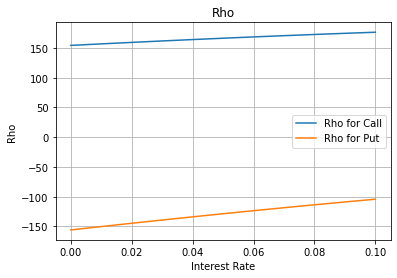

In [209]:
fig = plt.figure()
plt.plot(r, Rho_Call, '-')
plt.plot(r, Rho_Put, '-')
plt.grid()
plt.xlabel('Interest Rate')
plt.ylabel('Rho')
plt.title('Rho')
plt.legend(['Rho for Call', 'Rho for Put'])

In [274]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [275]:
S = np.linspace(50, 500, 51)
T = np.linspace(0.5, 2, 51)
Rho = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Rho[i,j] = rho(S[j], 310, T[i], 0.01536, 0, 0.299, 'call')

C:\Users\HPSPEC~1\AppData\Local\Temp/ipykernel_3484/614383355.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


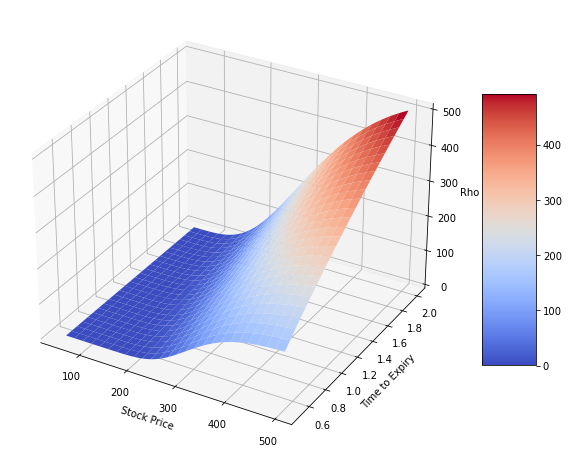

In [276]:
fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Rho, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Rho')
fig.colorbar(surf, shrink=0.5, aspect=5);

# Vega

Vega measures sensitivity to volatility. Vega is the derivative of the option value with respect to the volatility of the underlying asset.

In [210]:
def vega(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    vega = S * np.sqrt(T) * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)
    
    return vega

In [211]:
vega(1323.57, 310, 1, 0.01536, 0, 0.299, 'call')

0.0014891052252154352

In [212]:
vega(1323.57, 310, 1, 0.01536, 0, 0.299, 'put')

0.0014891052252154352

In [219]:
vol = np.linspace(0.1,0.6,13)
Vega = np.zeros((len(vol),1))
for i in range(len(vol)):
    Vega [i] = vega(128.89, 125, 1, 0.01536, 0.0143, vol[i], 'call')

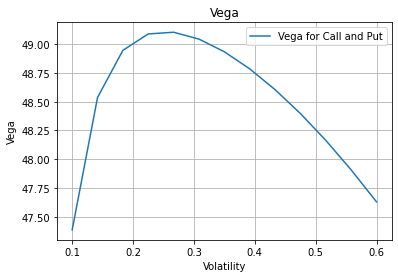

In [220]:
fig = plt.figure()
plt.plot(vol, Vega, '-')
plt.grid()
plt.xlabel('Volatility')
plt.ylabel('Vega')
plt.title('Vega')
plt.legend(['Vega for Call and Put'])

In [270]:
def vega(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    vega = S * np.sqrt(T) * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)
    
    return vega

In [271]:
S = np.linspace(50, 500, 51)
T = np.linspace(0.5, 2, 51)
Vega = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Vega[i,j] = vega(S[j], 310, T[i], 0.01536, 0, 0.299, 'call')

C:\Users\HPSPEC~1\AppData\Local\Temp/ipykernel_3484/1018290684.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


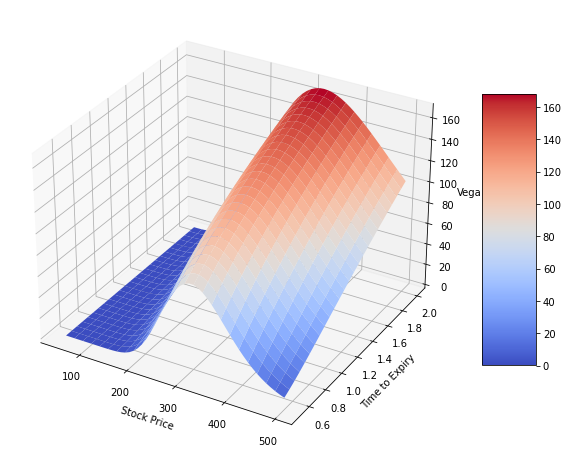

In [272]:
fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Vega, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Vega')
fig.colorbar(surf, shrink=0.5, aspect=5);

# The End of Coding Part. 